In [1]:
from io import BytesIO

from PIL import Image
import requests

In [2]:
no_human = "../tests/data/no_humans.jpg"
one_human = "../tests/data/one_human.jpg"
many_humans = "../tests/data/many_humans.jpeg"

### Check connection

In [3]:
response = requests.get("http://localhost:8000/")
response.json()

{'message': 'Welcome to face detection application based on Face++ and FastAPI'}

### Send image for face detection

In [4]:
input_image = [("file", open(one_human, "rb"))]
response = requests.post("http://localhost:8000/image", files=input_image)
response = response.json()
response

{'id': 'kAMcRB4FY+J6eYRv0HSlew=='}

### Get image with face bounding box

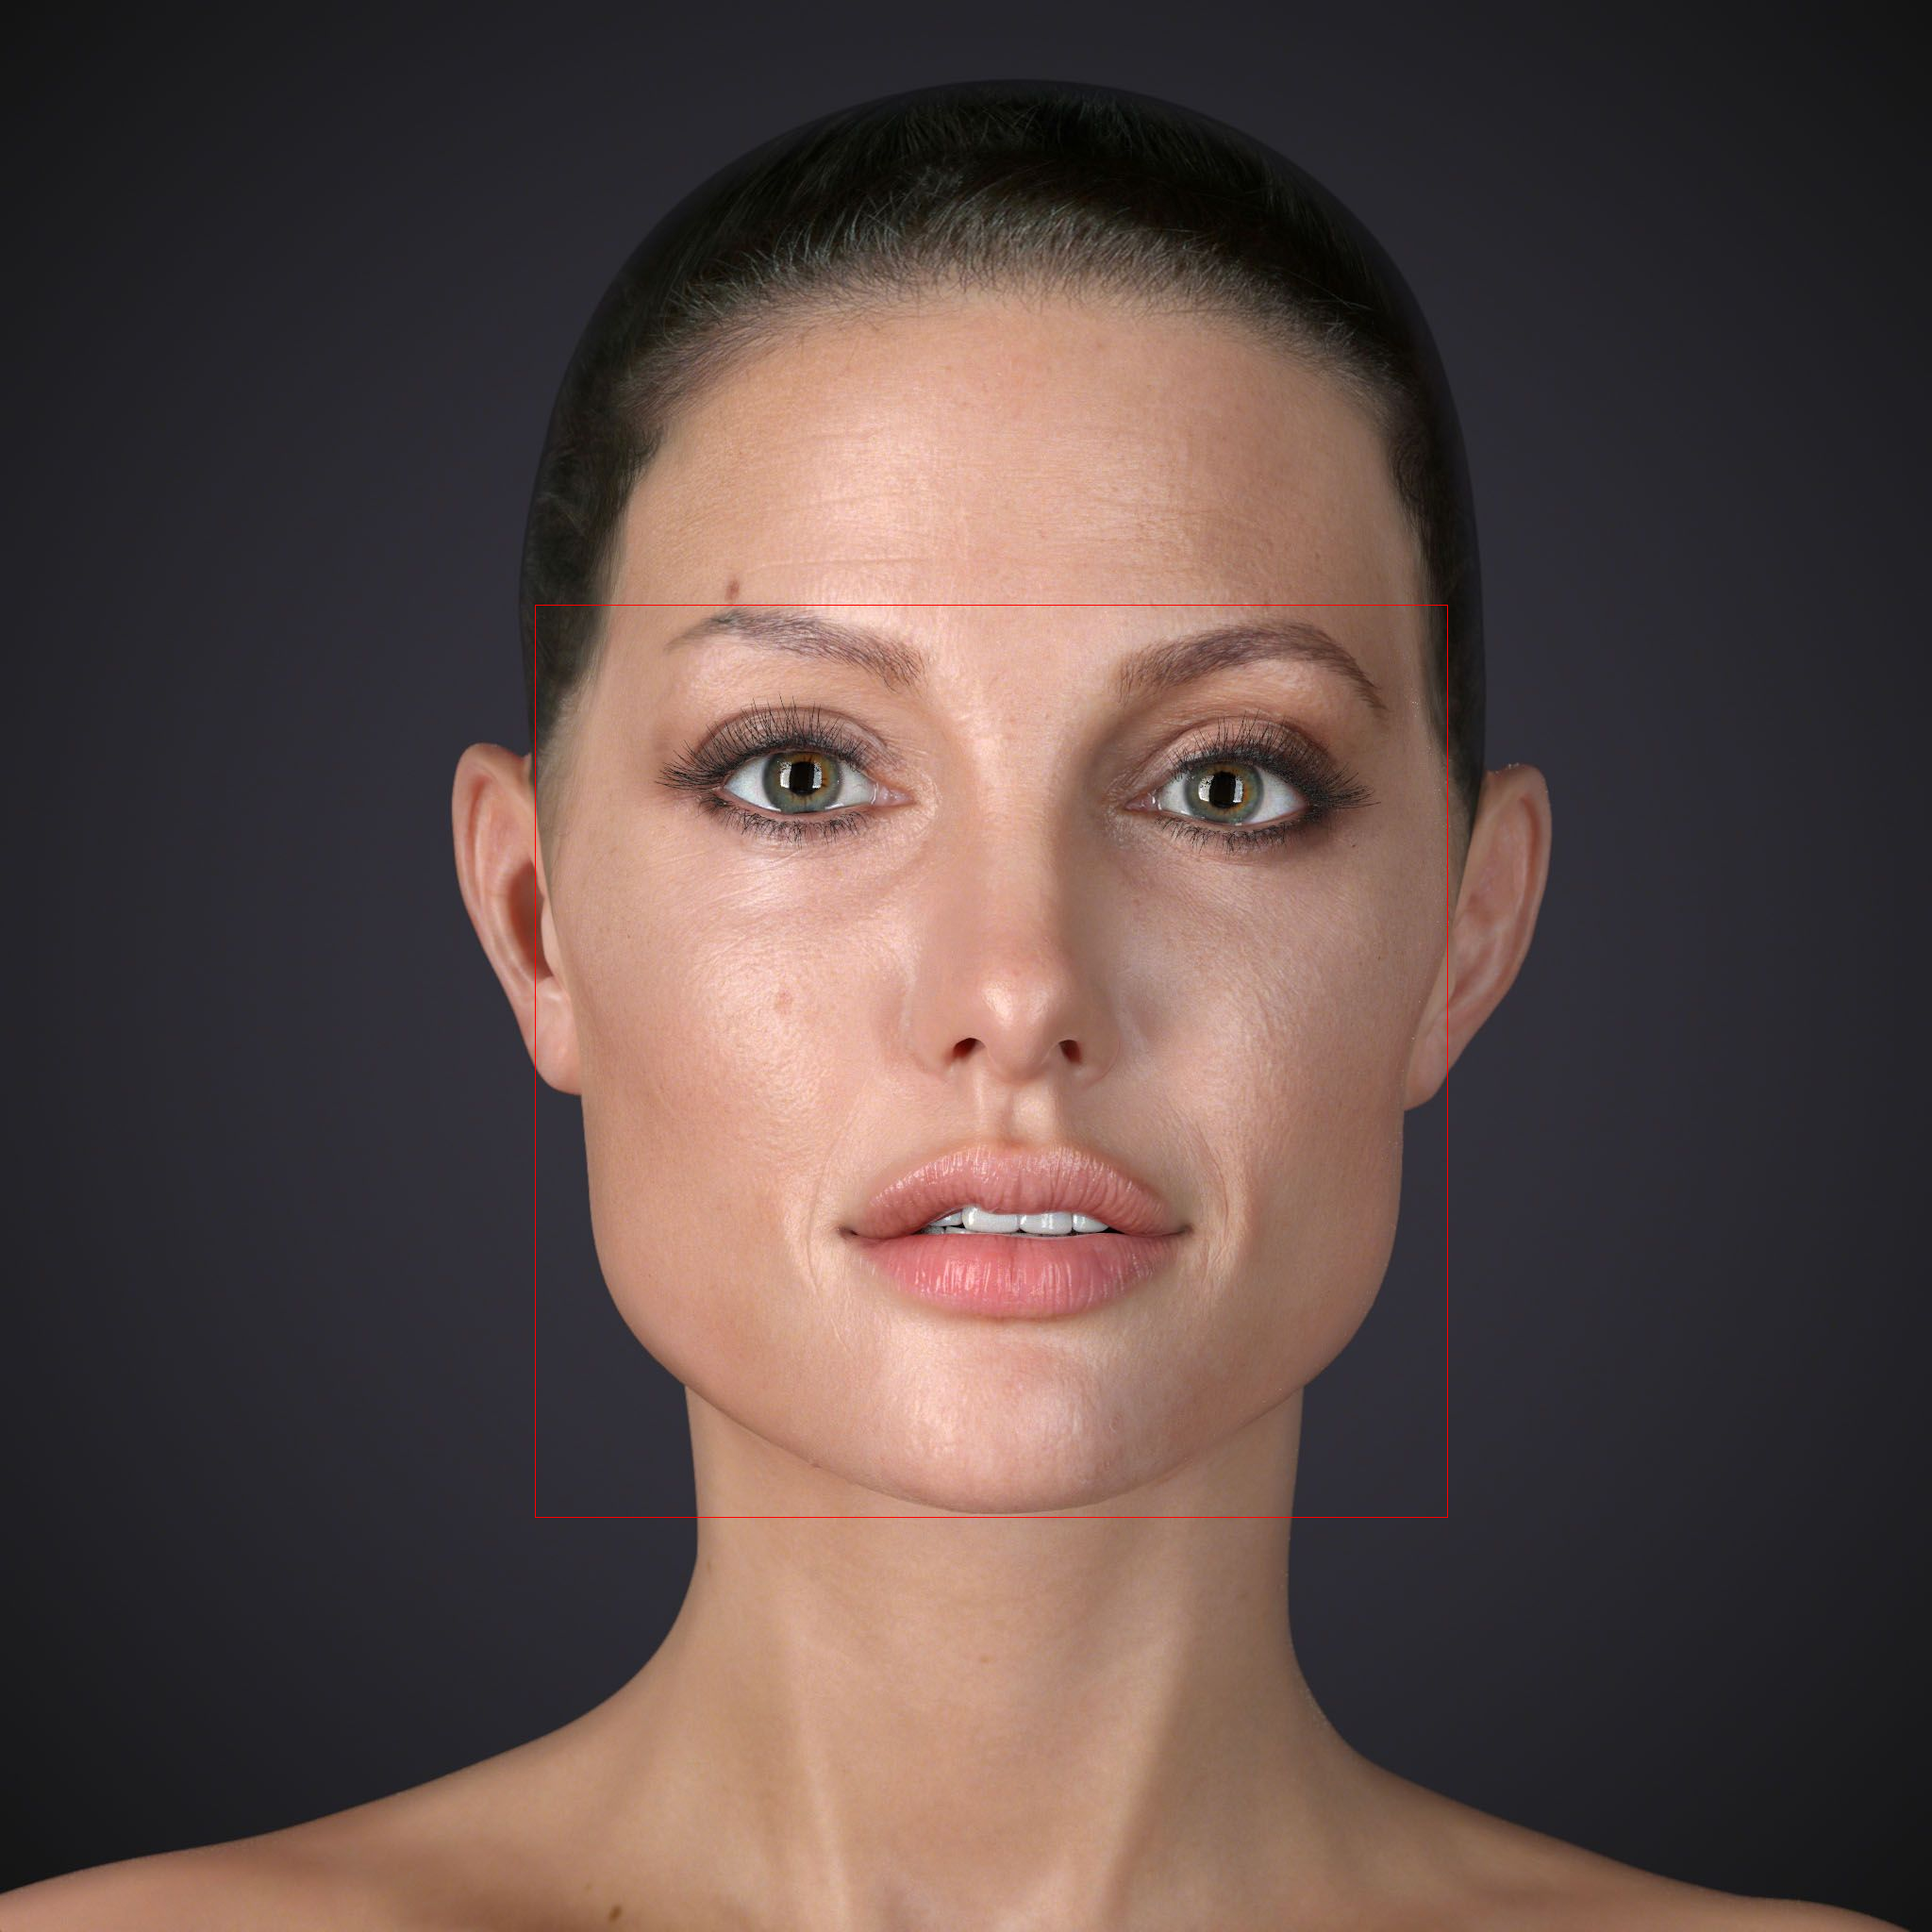

In [5]:
color = "red"
output_image = requests.get(f"http://localhost:8000/image/{response['id']}", params={"color": color})
Image.open(BytesIO(output_image.content))

### Replace image

In [6]:
input_image2 = [("file", open(many_humans, "rb"))]
replaced_response = requests.put(f"http://localhost:8000/image/{response['id']}", files=input_image2)
replaced_response = replaced_response.json()
replaced_response

{'id': 'kAMcRB4FY+J6eYRv0HSlew=='}

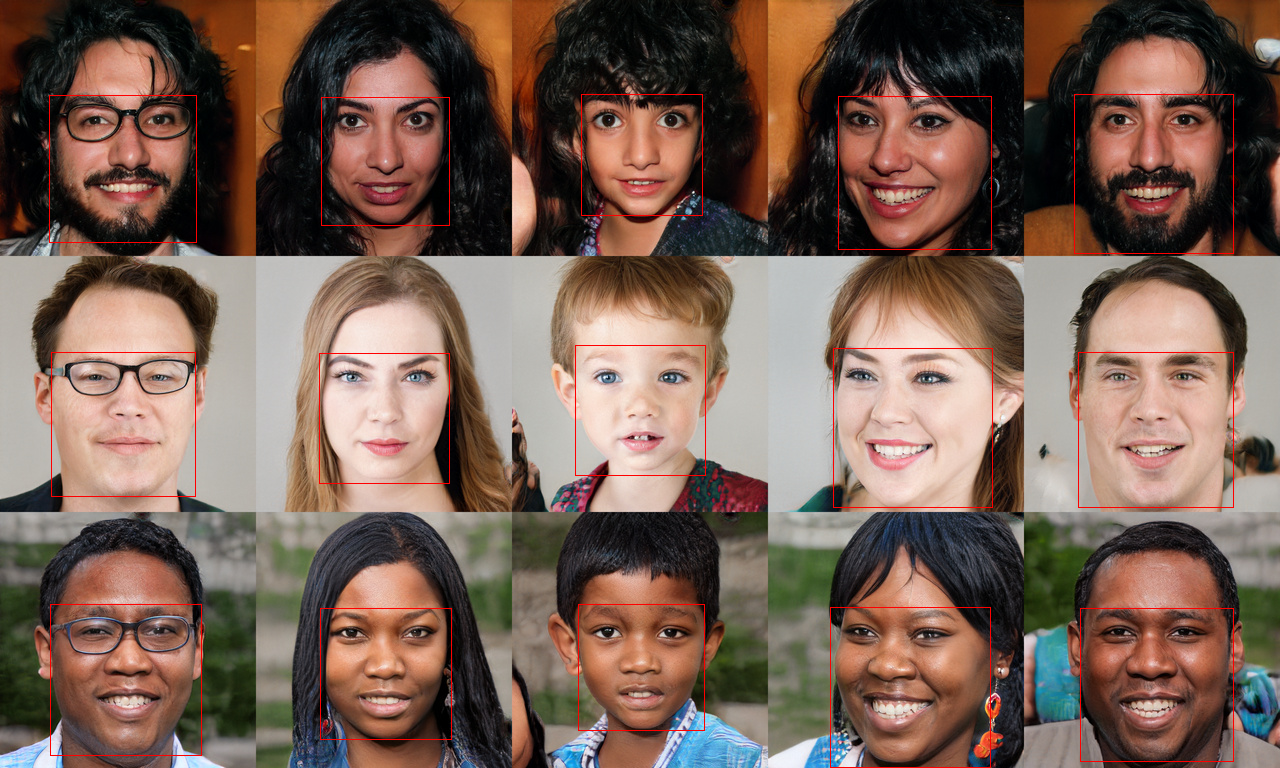

In [7]:
color = "red"
output_image2 = requests.get(f"http://localhost:8000/image/{replaced_response['id']}", params={"color": color})
Image.open(BytesIO(output_image2.content))

### Remove image

In [8]:
delete_response = requests.delete(f"http://localhost:8000/image/{replaced_response['id']}")